### 1. Import necessary packages

The first step is to import necessary packages for collecting atoms from given mmcif file, extracting coordinates, plotting and perform PCA. The required packages and the corresponding purpose are as follows:

1. Bio.PDB: Read the given mmcif file and collect Cα atoms
2. Numpy: Manipulate coordinates information. 
3. Matplotlib: Data visualization and plotting.
4. Sklearn: Perform principle component analysis. 

In [11]:
from Bio.PDB import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 2. Read the mmcif file

Next, we use functions from Biopython library to read the given mmcif file. Since the given file only contains a single model and a single chain, we use 
```ruby
chain = structure[0]['A']
``` 
to access the desired chain.

In [12]:
parser = MMCIFParser()
structure = parser.get_structure("Cα", "1dg3.cif")
chain = structure[0]['A']

### 3. Collect 3D coordinates of Cα atoms

After we have access to the chain that contains all Cα atoms, ```chain.get_atoms()``` is used to access each individual atom. In addition, given that we only need to extract Cα atoms, we filter out any atoms that are not of the type "Cα" and save the coordinate information of Cα atoms as a list of ndarrays.

In [18]:
lst_of_coor = []
for atom in chain.get_atoms(): #go through all atom in the given chain
    if atom.get_id() == "CA":
        lst_of_coor.append(atom.get_coord())
        
type(lst_of_coor[0])

numpy.ndarray

### 4. Plot Cα coordinates on the plane z=0

With 3D coordinates collected for all Cα atoms, coordinate for each axis is extracted and stored into corresponding variables. Since the plot is on the plane z=0, coordinates other than z(x and y) are displayed as scatter plot.

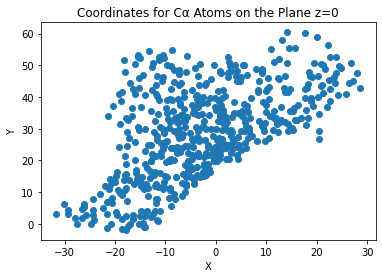

In [35]:
coor = np.vstack(lst_of_coor)
x = coor[:, 0]
y = coor[:, 1]
z = coor[:, 2]

plt.scatter(x, y)

plt.title('Coordinates for Cα Atoms on the Plane z=0')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

### 5. Compute PCA on Cα coordinates and plot result

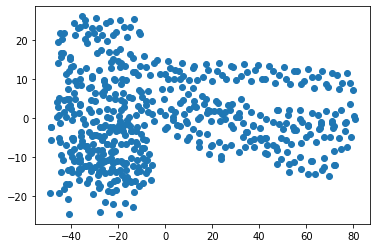

In [15]:
pca = PCA(n_components=2)
new_coor = pca.fit_transform(coor)
new_x = new_coor[:, 0]
new_y = new_coor[:, 1]

plt.scatter(new_x, new_y)